In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# Grab the training data
# train_path = '/kaggle/input/restaurant-revenue-prediction/train.csv.zip'
# test_path = '/kaggle/input/restaurant-revenue-prediction/test.csv.zip'

# Path for github dir
train_path = 'competition-data/train.csv'
test_path = 'competition-data/test.csv'


df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path) # Does not have 'revenue' column

# df_train.dtypes # Shows type of elements in column
df_train.head() # Shows columns and first 5 rows

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [5]:
# Choose model parameters
train_X = df_train[['City', 'City Group', 'Type']] # (137 x 3)
test_X = df_test[['City', 'City Group', 'Type']] # (100,000 x 3)

# Response variable
train_Y = df_train[['revenue']] # (137 x 1)

train_X.head() 

,City,City Group,Type
0,İstanbul,Big Cities,IL
1,Ankara,Big Cities,FC
2,Diyarbakır,Other,IL
3,Tokat,Other,IL
4,Gaziantep,Other,IL


In [31]:
df_train[['Id', 'revenue']].describe()

,Id,revenue
count,137.000000,1.370000e+02
mean,68.000000,4.453533e+06
std,39.692569,2.576072e+06
min,0.000000,1.149870e+06
25%,34.000000,2.999068e+06
50%,68.000000,3.939804e+06
75%,102.000000,5.166635e+06
max,136.000000,1.969694e+07


DT         AxesSubplot(0.1,0.559091;0.363636x0.340909)
FC    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
IL             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

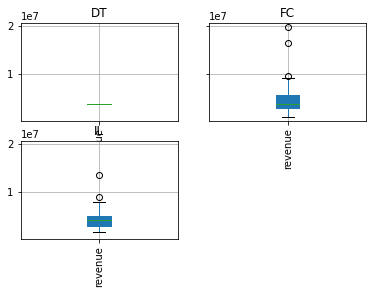

In [30]:
# 'Explore our data'
df_train[['Type','revenue']].groupby('Type').boxplot(rot=90, patch_artist=True)

<AxesSubplot:xlabel='City'>

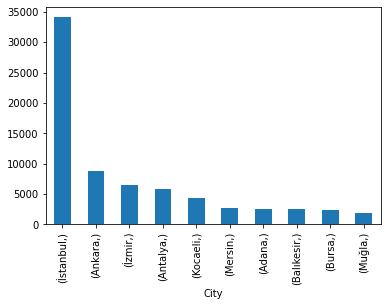

In [32]:
df_test[['City']].value_counts().nlargest(10).plot.bar()


$Y = \beta_0 + \beta_{City}X_{City} + \beta_{City Type} X_{City Type} \beta_{Type} X_{R} + ...$

where $X \in \{0, 1\}$. 1 if the given restaurant is in that city/group/type, else 0.

In [6]:
from copy import copy

# The training data doesnt have the same amount of cities/types/group as the test data
# We will create dummy variables (1's 0's to use them as parameters in our model)

all_cities = pd.concat(objs=[train_X, test_X], axis=0) # Add test data to bottom of training data

all_city_dummies = pd.get_dummies(all_cities) # Create dummy variables

train_X = copy(all_city_dummies[:len(train_X)])
test_X = copy(all_city_dummies[len(train_X):])
print(
    train_X.shape,
    test_X.shape
)

(137, 69) (100000, 69)


In [7]:
# Fit the model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X, train_Y)

LinearRegression()

In [8]:
model.coef_

array([[ 8.62698264e+18,  8.62698264e+18,  1.61111669e+18,
         8.62698264e+18, -3.08126802e+17,  8.62698264e+18,
         1.83034589e+18,  8.62698264e+18,  8.62698264e+18,
         6.73548941e+17,  4.25912602e+17,  8.62698264e+18,
         8.62698264e+18,  8.62698264e+18,  8.62698264e+18,
        -1.03625581e+17,  8.62698264e+18,  8.62698264e+18,
        -3.06465605e+13,  0.00000000e+00,  8.62698264e+18,
         8.62698264e+18,  0.00000000e+00,  5.82076609e-11,
         8.62698264e+18, -3.49245965e-10,  8.62698264e+18,
        -2.50736321e-10,  8.62698264e+18,  8.62698264e+18,
         8.62698264e+18,  8.62698264e+18,  8.62698264e+18,
         8.62698264e+18,  1.16415322e-10, -1.16415322e-10,
        -2.08046913e-11,  0.00000000e+00,  0.00000000e+00,
         1.05728759e-11,  8.62698264e+18, -9.31322575e-10,
         0.00000000e+00,  0.00000000e+00,  8.62698264e+18,
         0.00000000e+00,  8.62698264e+18,  8.62698264e+18,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

<AxesSubplot:xlabel='revenue'>

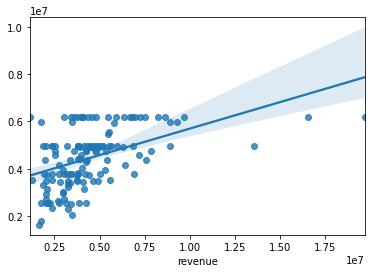

In [14]:
# Change to residuals
sns.regplot(train_Y, model.predict(train_X))

In [9]:
predictions = model.predict(test_X)

# Remove prediction outliers
for i in range(len(predictions)):
    if predictions[i] < 0 or predictions[i] > 10**10:
        predictions[i] = 0
    
    

In [10]:
# Create an 'Id' column which is equal to the index
pred_df = pd.DataFrame(predictions, columns=['Prediction'])
pred_df['Id'] = pred_df.index
pred_df.head()

,Prediction,Id
0,0.0,0
1,2056192.0,1
2,3784704.0,2
3,2510848.0,3
4,6152192.0,4


In [11]:
pred_df.shape

(100000, 2)

In [12]:
pred_df.to_csv('submission.csv', index=False)